# Random Forests

In [19]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline


## Loading and Preprocessing Summer Grouped by Date Data

In [20]:
# Loading data
df_old = pd.read_csv("summer_groupby_date.csv")
df_old.head()

,Unnamed: 0,Date,LKSPOMET_ATemp,LKSBAWQ_Temp,LKSPOMET_WSpd,LKSBAWQ_Depth,LKSBAWQ_pH,LKSBAWQ_ChlFluor,LKSPOMET_TotPrcp,LKSBAWQ_Turb,Turbidity_Range,Month,Day,Year
0,0,06/01/2022,14.470833,14.061458,1.895833,1.229271,7.500000,9.479167,0.0,13.218750,</=15,6,1,2022
1,1,06/02/2022,15.936458,14.568750,2.660417,1.188958,7.477083,8.915625,0.0,11.458333,</=15,6,2,2022
2,2,06/03/2022,12.998958,15.028125,3.745833,1.208750,7.522917,8.331250,0.0,11.062500,</=15,6,3,2022
3,3,06/04/2022,16.417708,15.969792,1.981250,1.231667,7.500000,9.055208,0.0,10.197917,</=10,6,4,2022
4,4,06/05/2022,9.801042,16.790625,1.476042,1.223125,7.493750,9.984375,0.0,9.395833,</=10,6,5,2022


In [21]:
 
df = df_old[[       'Month',
                     'LKSBAWQ_Temp',
                    'LKSBAWQ_ChlFluor',
                    'LKSBAWQ_Depth',
                    'LKSBAWQ_pH',
                     'Turbidity_Range',
                   ]]
df.head()

,Month,LKSBAWQ_Temp,LKSBAWQ_ChlFluor,LKSBAWQ_Depth,LKSBAWQ_pH,Turbidity_Range
0,6,14.061458,9.479167,1.229271,7.500000,</=15
1,6,14.568750,8.915625,1.188958,7.477083,</=15
2,6,15.028125,8.331250,1.208750,7.522917,</=15
3,6,15.969792,9.055208,1.231667,7.500000,</=10
4,6,16.790625,9.984375,1.223125,7.493750,</=10


In [22]:
# Define features set
X = df.copy()
X.drop("Turbidity_Range", axis=1, inplace=True)
X.head()

,Month,LKSBAWQ_Temp,LKSBAWQ_ChlFluor,LKSBAWQ_Depth,LKSBAWQ_pH
0,6,14.061458,9.479167,1.229271,7.500000
1,6,14.568750,8.915625,1.188958,7.477083
2,6,15.028125,8.331250,1.208750,7.522917
3,6,15.969792,9.055208,1.231667,7.500000
4,6,16.790625,9.984375,1.223125,7.493750


In [23]:
# Define target vector
y = df["Turbidity_Range"].ravel()
y[:50]

array(['</=15', '</=15', '</=15', '</=10', '</=10', '</=10', '</=10',
       '</=15', '</=15', '</=15', '</=15', '</=15', '</=15', '</=15',
       '</=15', '</=15', '</=15', '</=15', '</=15', '</=15', '</=10',
       '</=15', '</=10', '</=15', '</=10', '</=20', '</=10', '</=15',
       '</=10', '</=15', '</=15', '</=15', '</=10', '</=15', '</=10',
       '</=20', '</=15', '</=15', '</=20', '</=15', '</=15', '</=15',
       '</=15', '</=15', '</=10', '</=15', '</=10', '</=15', '</=10',
       '</=15'], dtype=object)

In [24]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [25]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [26]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [27]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [28]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=150, random_state=78)

In [29]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [30]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [31]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual </=5", "Actual </=10", "Actual </=15"], 
        columns=["Predicted </=5", "Predicted </=10", "Predicted </15"])
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [32]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted </=5,Predicted </=10,Predicted </15
Actual </=5,13,1,0
Actual </=10,1,12,0
Actual </=15,0,0,10


Accuracy Score : 0.9459459459459459
Classification Report
              precision    recall  f1-score   support

       </=10       0.93      0.93      0.93        14
       </=15       0.92      0.92      0.92        13
        </=5       1.00      1.00      1.00        10

    accuracy                           0.95        37
   macro avg       0.95      0.95      0.95        37
weighted avg       0.95      0.95      0.95        37



## Feature Importance

In [33]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.29826272749575766, 'LKSBAWQ_ChlFluor'),
 (0.2440892036163042, 'LKSBAWQ_pH'),
 (0.1767221374318277, 'LKSBAWQ_Depth'),
 (0.16736238346907426, 'LKSBAWQ_Temp'),
 (0.1135635479870362, 'Month')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

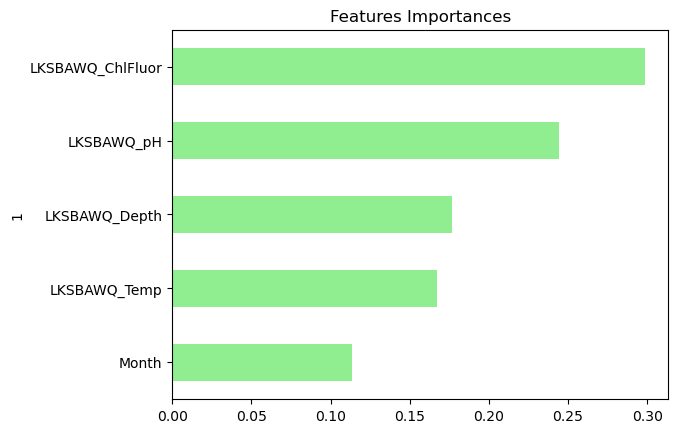

In [34]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)